# Вступительное задание. ЛШ-2017

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
abilities = pd.read_csv('abilities.csv')
eggs = pd.read_csv('egg_groups.csv')
pokemons = pd.read_csv('pokemon.csv')

### Посмотрим, что вообще содержится в данных

In [3]:
pokemons.columns

Index(['id', 'identifier', 'name', 'name_phonetic', 'species', 'name_jp',
       'name_jp_romaji', 'species_jp', 'generation_id', 'ndex', 'kdex', 'jdex',
       'jdex_old', 'hdex', 'sdex', 'udex', 'type1_id', 'type2_id',
       'ability1_id', 'ability2_id', 'abilitydream_id',
       'evolution_parent_pokemon_id', 'evolution_method_id',
       'evolution_parameter', 'height', 'weight', 'gender_rate', 'catch_rate',
       'exp_yield', 'base_happiness', 'egg_group1_id', 'egg_group2_id',
       'is_baby', 'baby_breed_item_id', 'hatch_counter', 'lvl_100_exp',
       'pokemon_order', 'legacy_id'],
      dtype='object')

In [4]:
len(pokemons.columns)

38

### По приколу нашла Пикачу, хы

In [5]:
pokemons[pokemons['name'] == 'Pikachu']

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
24,25,pikachu,Pikachu,Peekachoo,Mouse,ピカチュウ,Pikachu,ねずみ,1,25,...,82,70,5,6.0,0,NaN,10,1000000,26,25.0


![Image of Yaktocat](https://img.pokemondb.net/artwork/pikachu.jpg)

### Посчитаем количество видов покемонов

In [6]:
alf = [chr(x) for x in range(ord('A'), ord('Z')+1)] #создаем список из букв английского алфавита
lst = list(pokemons.species.sort_values())
number_of_species = len(set(lst))
print ('Существует', number_of_species, 'видов покемонов')

Существует 475 видов покемонов


### А теперь найдем самую популярную и непопулярную первую букву имени среди покемонов 

In [7]:
# можно как-то сделать через словарь, но надо подумать еще
list_of_names = list(pokemons.name.sort_values())
i = 0
lst = list()
number_of_certain_names = list()

print ('Количество имен, начинающихся на конкретную букву')

for letter in alf:
    for name in list_of_names:
        if name[0] == letter:
            lst.append(name)
    amount = len(lst)
    number_of_certain_names.append(amount)
    print(letter, ':', amount)
    lst = list()
    
nmax = max(number_of_certain_names)
nmin = min(number_of_certain_names)

indmax = number_of_certain_names.index(nmax)
indmin = number_of_certain_names.index(nmin)

Количество имен, начинающихся на конкретную букву
A : 28
B : 34
C : 50
D : 39
E : 20
F : 17
G : 43
H : 23
I : 4
J : 7
K : 22
L : 33
M : 58
N : 14
O : 6
P : 43
Q : 3
R : 30
S : 95
T : 33
U : 5
V : 20
W : 23
X : 1
Y : 3
Z : 9


In [8]:
print('Чаще всего имя покемона начинается с буквы ', alf[indmax], ':', nmax, 'раз')
print('Реже всего имя покемона начинается с буквы ', alf[indmin], ':', nmin, 'раз')

Чаще всего имя покемона начинается с буквы  S : 95 раз
Реже всего имя покемона начинается с буквы  X : 1 раз


### Кто же этот единственный покемончик?

In [9]:
for name in list_of_names:
    if name[0] == 'X':
        print (name)

Xatu


In [10]:
pokemons[pokemons['name'] == 'Xatu']

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
177,178,xatu,Xatu,Xatu,Mystic,ネイティオ,Natio,せいれい,2,178,...,171,70,4,NaN,0,NaN,20,1000000,206,178.0


## Знакомьтесь. Xatu

![Image of Yaktocat](https://img.pokemondb.net/artwork/xatu.jpg)

__Он скучненький и может быть поэтому один. Может часами стоять и следить глазами за солнцем, видит прошлое и будущее.__

### Гениальная (не очень) идея: а давайте построим график по всему датасету!

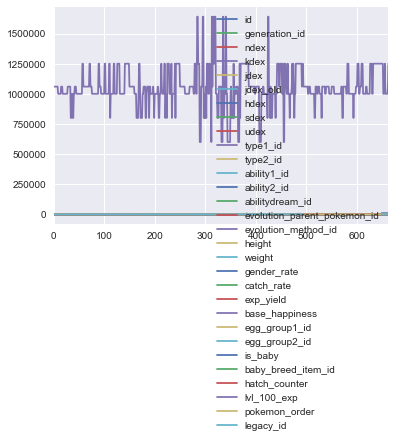

In [11]:
pokemons.plot()

### А я сразу говорила, что идея так себе


### Лучше построим какие-нибудь нормальные графики. Например, частотное распределение имен

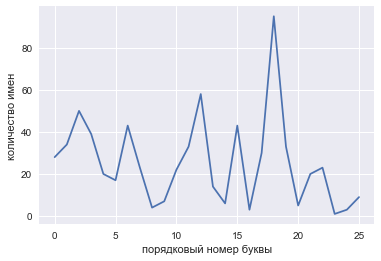

In [12]:
plt.plot(number_of_certain_names)
plt.xlabel('порядковый номер буквы')
plt.ylabel('количество имен')

# Попробуем найти самые популярные способности

### План действий такой:

#### 1) посчитаем, у скольких покемонов есть только одна способность
#### 2) потом - у скольких две
#### 3) самая популярная желаемая способность


In [13]:
pokemons.columns

Index(['id', 'identifier', 'name', 'name_phonetic', 'species', 'name_jp',
       'name_jp_romaji', 'species_jp', 'generation_id', 'ndex', 'kdex', 'jdex',
       'jdex_old', 'hdex', 'sdex', 'udex', 'type1_id', 'type2_id',
       'ability1_id', 'ability2_id', 'abilitydream_id',
       'evolution_parent_pokemon_id', 'evolution_method_id',
       'evolution_parameter', 'height', 'weight', 'gender_rate', 'catch_rate',
       'exp_yield', 'base_happiness', 'egg_group1_id', 'egg_group2_id',
       'is_baby', 'baby_breed_item_id', 'hatch_counter', 'lvl_100_exp',
       'pokemon_order', 'legacy_id'],
      dtype='object')

In [14]:
pk = pokemons[['name', 'species', 'ability1_id', 'ability2_id', 'abilitydream_id', 'generation_id']].copy()
pk.head()

,name,species,ability1_id,ability2_id,abilitydream_id,generation_id
0,Bulbasaur,Seed,65,NaN,34.0,1
1,Ivysaur,Seed,65,NaN,34.0,1
2,Venusaur,Seed,65,NaN,34.0,1
3,Charmander,Lizard,66,NaN,94.0,1
4,Charmeleon,Flame,66,NaN,94.0,1


### В следующей ячейке волшебный код, который даст ответ на первые 2 пункта и немного скажет о третьем 

In [15]:
n = len(pk['name'])

#посчитаем, у скольких покемонов есть только одна способность
nab1 = np.count_nonzero(~np.isnan(pk['ability1_id']))

#а теперь тех, у кого есть вторая способность
nab2 = np.count_nonzero(~np.isnan(pk['ability2_id']))


#проверим, сколько покемонов мечтают о способности, которой у них нет
nabdr = np.count_nonzero(~np.isnan(pk['abilitydream_id']))

print('Всего в датасете', n , 'покемона')
print()
print(nab1, 'из них имеют как минимум одну способность')
print(nab2, 'покемонам повезло иметь сразу 2 способности')
print(nabdr, '- столько покемонов мечтает о новой суперспособности')

Всего в датасете 663 покемона

663 из них имеют как минимум одну способность
355 покемонам повезло иметь сразу 2 способности
571 - столько покемонов мечтает о новой суперспособности


### Приведем последние 2 столбика датасета к int, так приятнее

In [16]:
pk[['ability2_id']] = pk[['ability2_id']].fillna(0.0).astype(int)
pk[['abilitydream_id']] = pk[['abilitydream_id']].fillna(0.0).astype(int)

In [17]:
pk.head()

,name,species,ability1_id,ability2_id,abilitydream_id,generation_id
0,Bulbasaur,Seed,65,0,34,1
1,Ivysaur,Seed,65,0,34,1
2,Venusaur,Seed,65,0,34,1
3,Charmander,Lizard,66,0,94,1
4,Charmeleon,Flame,66,0,94,1


In [18]:
abilities.head()

,id,identifier,name,name_jp,name_jp_tm,generation_id,color_id
0,1,stench,Stench,あくしゅう,Stench,3,4
1,2,drizzle,Drizzle,あめふらし,Rainfall,3,11
2,3,speed-boost,Speed Boost,かそく,Acceleration,3,23
3,4,battle-armor,Battle Armor,カブトアーマー,Kabuto Armor,3,6
4,5,sturdy,Sturdy,がんじょう,Sturdy,3,6


### Выясним, какой первой способностью обладает наибольшее количество покемонов

In [19]:
grouped_ab1 = pk.groupby('ability1_id')['species'].count()
ind_max_ab1 = list(grouped_ab1).index(max(grouped_ab1))
print(ind_max_ab1, 'по индексу строка содержит в себе самую распространенную первую способность.')
print('Ей обладают', max(grouped_ab1), 'покемонов.')

24 по индексу строка содержит в себе самую распространенную первую способность.
Ей обладают 38 покемонов.


### То, что индекс 24, ни о чем не говорит. Мы должны проверить, какая именно способность соответствует самой частовстречаемой

In [20]:
grouped_ab1[24:25]

ability1_id
26    38
Name: species, dtype: int64

## Отлично! Теперь мы знаем, что самая частовстречаемая способность кодируется номером 26. Скорее смотреть в другой датасет!

In [21]:
abilities[abilities['id'] == 26]

,id,identifier,name,name_jp,name_jp_tm,generation_id,color_id
25,26,levitate,Levitate,ふゆう,Floating,3,3


### Построим график

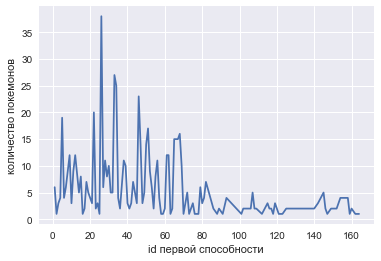

In [22]:
plt.plot(grouped_ab1)
plt.xlabel('id первой способности ')
plt.ylabel('количество покемонов')

### На графике видно, что чаще встречаются способности из первой половины списка. Тем не менее нельзя сказать, что какая-то из них уж очень распространена. 38 покемонов из 633 - всего лишь 6% от общего количества

In [23]:
round((38/633)*100)

6

### Посмотрим, к каким видам принадлежат покемоны, умеющие левитировать

In [24]:
pk_ab1 = pokemons[pokemons['ability1_id'] == 26]
pk_ab1.species.values

array(['Gas', 'Gas', 'Shadow', 'Poison Gas', 'Poison Gas', 'Screech',
       'Symbol', 'Vibration', 'Mystic', 'Meteorite', 'Meteorite',
       'Clay Doll', 'Clay Doll', 'Requiem', 'Wind Chime', 'Eon', 'Eon',
       'Magical', 'Bell', 'Bronze', 'Bronze Bell', 'Bug Catcher', 'Plasma',
       'Knowledge', 'Emotion', 'Willpower', 'Lunar', 'EleFish', 'EleFish',
       'EleFish', 'Crystallizing', 'Brutal', 'Renegade', 'Plasma',
       'Plasma', 'Plasma', 'Plasma', 'Plasma'], dtype=object)

In [25]:
pk_ab1.tail()

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
656,10008,rotom,Rotom,Rotom,Plasma,ロトム,Rotom,プラズマ,4,479,...,132,70,11,NaN,0,NaN,20,1000000,490,485.0
657,10009,rotom,Rotom,Rotom,Plasma,ロトム,Rotom,プラズマ,4,479,...,132,70,11,NaN,0,NaN,20,1000000,492,486.0
658,10010,rotom,Rotom,Rotom,Plasma,ロトム,Rotom,プラズマ,4,479,...,132,70,11,NaN,0,NaN,20,1000000,489,487.0
659,10011,rotom,Rotom,Rotom,Plasma,ロトム,Rotom,プラズマ,4,479,...,132,70,11,NaN,0,NaN,20,1000000,488,488.0
660,10012,rotom,Rotom,Rotom,Plasma,ロトム,Rotom,プラズマ,4,479,...,132,70,11,NaN,0,NaN,20,1000000,491,499.0


### А теперь посмотрим, кто из них самый счастливый

In [26]:
happy = pk_ab1.base_happiness.values
mhappy = max(happy)
mhappy

140

In [27]:
#максимальный уровень счастья вообще
max(pokemons.base_happiness.values)

140

In [28]:
pk_ab1[pk_ab1['base_happiness'] == 140]

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
479,480,uxie,Uxie,Uxie,Knowledge,ユクシー,Yuxie,ちしき,4,480,...,210,140,15,NaN,0,NaN,80,1250000,493,490.0
480,481,mesprit,Mesprit,Mesprit,Emotion,エムリット,Emrit,かんじょう,4,481,...,210,140,15,NaN,0,NaN,80,1250000,494,491.0
481,482,azelf,Azelf,Azelf,Willpower,アグノム,Agnome,いし,4,482,...,210,140,15,NaN,0,NaN,80,1250000,495,492.0


## Перед вами Uxie, Mesprit и Azelf. Это Lake Guardians

![Image of Yaktocat](https://cdn.bulbagarden.net/upload/thumb/4/46/Lake_guardians_DP.png/794px-Lake_guardians_DP.png)

### Кстати говоря, интересный факт
#### Их имена образованы частично от личных местоимений (you, me, us), частично от названий фантастических животных(pixies, sprites, elves).
#### Сами они символизируют знание, эмоции и силу воли. Еще здесь есть отсылка к регалиям японских императоров, которые, в свою очередь символизируют мудрость, процветание и мужество.

#### Думаю, они максимально счастливы, потому что являются положительными персонажами и вообще очень возвышенные.

### Теперь проделаем ту же процедуру для второй способности

In [29]:
#выясняем, какой второй способностью обладает наибольшее количество покемонов
grouped_ab2 = pk.groupby('ability2_id')['species'].count()
ind_max_ab2 = list(grouped_ab2).index(max(grouped_ab2))
print(ind_max_ab2, 'по индексу строка содержит в себе самую распространенную вторую способность.')
print('Ей обладают', max(grouped_ab2), 'покемонов.')

0 по индексу строка содержит в себе самую распространенную вторую способность.
Ей обладают 308 покемонов.


### Получилось не то, что планировалось: мы нашли количество покемонов, которые не обладают второй способностью

In [30]:
ind_max_ab2 = list(grouped_ab2[1:]).index(max(grouped_ab2[1:]))
print(ind_max_ab2, 'по индексу строка содержит в себе самую распространенную вторую способность.')
print('Ей обладают', max(grouped_ab2[1:]), 'покемонов.')

1 по индексу строка содержит в себе самую распространенную вторую способность.
Ей обладают 11 покемонов.


In [31]:
grouped_ab2[1:][1:2]

ability2_id
5    11
Name: species, dtype: int64

In [32]:
abilities[abilities['id'] == 5]

,id,identifier,name,name_jp,name_jp_tm,generation_id,color_id
4,5,sturdy,Sturdy,がんじょう,Sturdy,3,6


## Самая популярная вторая способность - крепкость. Она тоже не очень распространена: всего лишь у 4% покемонов, обладающих двумя способностями

In [33]:
round((11/355)*100)+1

4

In [34]:
pk_ab2 = pokemons[pokemons['ability2_id'] == 5]
pk_ab2.species.values

array(['Rock', 'Rock', 'Megaton', 'Magnet', 'Magnet', 'Rock Snake',
       'Iron Snake', 'Armor Bird', 'Magnet Area', 'Prototurtle',
       'Prototurtle'], dtype=object)

### Что там с уровнем счастья? Он одинаков

In [35]:
pk_ab2.base_happiness.values

array([70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70])

### Построим график

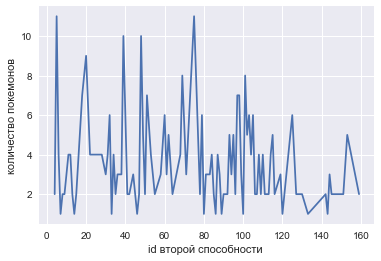

In [36]:
plt.plot(grouped_ab2[1:])
plt.xlabel('id второй способности ')
plt.ylabel('количество покемонов')

### На графике снова видим, что способности распространены по-разному. Но есть закономерность, что последние способности из списка распространены чуть меньше. Можем выдвинуть гипотезу, что способности из конца списка уникальные и их трудно получить

### Еще видим, что глобальных максимумов 2, но функция max( ) сообщила нам только о первом из них. Посмотрим, что за способность распространена еще у 11 покемонов

In [37]:
ind_max_ab2 = list(grouped_ab2[4:]).index(max(grouped_ab2[4:]))
print(ind_max_ab2, 'по индексу строка содержит в себе самую распространенную вторую способность.')
print('Ей обладают', max(grouped_ab2[4:]), 'покемонов.')

41 по индексу строка содержит в себе самую распространенную вторую способность.
Ей обладают 11 покемонов.


In [38]:
grouped_ab2[4:][41:42]

ability2_id
75    11
Name: species, dtype: int64

In [39]:
abilities[abilities['id'] == 75]

,id,identifier,name,name_jp,name_jp_tm,generation_id,color_id
74,75,shell-armor,Shell Armor,シェルアーマー,Shell Armor,3,11


## У 11 покемонов в качестве второй суперспособности выступает панцирь

### Посмотрим, какие виды обладают им

In [40]:
pk_ab2_2 = pokemons[pokemons['ability2_id'] == 5]
pk_ab2_2.species.values

array(['Rock', 'Rock', 'Megaton', 'Magnet', 'Magnet', 'Rock Snake',
       'Iron Snake', 'Armor Bird', 'Magnet Area', 'Prototurtle',
       'Prototurtle'], dtype=object)

### Уровень счастья снова одинаков

In [41]:
pk_ab2_2.base_happiness.values

array([70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70])

### Теперь попытаемся узнать, о чем мечтают покемончики. Совпадают ли их стремления или они хотят быть оригинальными?

In [42]:
#выясняем, какой второй способностью обладает наибольшее количество покемонов
grouped_ab_dr = pk.groupby('abilitydream_id')['species'].count()
ind_max_ab_dr = list(grouped_ab_dr).index(max(grouped_ab_dr))
print(ind_max_ab_dr, 'по индексу строка содержит в себе самую желанную способность.')
print(max(grouped_ab_dr), 'покемона не мечтают ни о какой способности.')

0 по индексу строка содержит в себе самую желанную способность.
92 покемона не мечтают ни о какой способности.


### 92 в несколько раз меньше, чем 355. Это означает, что даже те покемоны, которые уже являются счастливыми обладателями второй способностью, не отказались бы от новой фичи

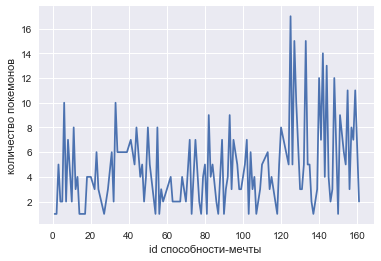

In [43]:
#в этот раз построим график заранее
plt.plot(grouped_ab_dr[1:])
plt.xlabel('id способности-мечты ')
plt.ylabel('количество покемонов')

### Выдвинутая ранее гипотеза об уникальности последних способностей выглядит правдой, потому что на первых двух графиках правая часть уходила вниз, а здесь наоборот взмылась вверх


### Найдем глобальный максимум

In [44]:
ind_max_ab_dr = list(grouped_ab_dr[1:]).index(max(grouped_ab_dr[1:]))
print(ind_max_ab_dr, 'по индексу строка содержит в себе самую желанную способность.')
print(max(grouped_ab_dr[1:]), 'покемонов мечтают об одной и той же способности.')

87 по индексу строка содержит в себе самую желанную способность.
17 покемонов мечтают об одной и той же способности.


In [45]:
grouped_ab_dr[1:][87:88]

abilitydream_id
125    17
Name: species, dtype: int64

In [46]:
abilities[abilities['id'] == 125]

,id,identifier,name,name_jp,name_jp_tm,generation_id,color_id
124,125,sheer-force,Sheer Force,ちからずく,Sheer Force,5,2


## Если верить переводчику, то целых 17 покемонов мечтают об обладании "грубой силой", которая позволила бы им легко справляться со своими соперниками

### Давайте узнаем, кто уже обладает этой способностью

In [47]:
pk_ab_dr = pokemons[pokemons['abilitydream_id'] == 125]
pk_ab_dr.species.values

array(['Drill', 'Drill', 'River Crab', 'Pincer', 'Wild Bull', 'Big Jaw',
       'Big Jaw', 'Big Jaw', 'Iron Snake', 'Guts', 'Arm Thrust',
       'Deceiver', 'Ant Pit', 'Rock Head', 'Head Butt', 'Head Butt',
       'Abundance'], dtype=object)

### Найдем самого тяжелого покемона среди обладающих данной способностью

In [48]:
weight = pk_ab_dr.weight.values
max(weight)

4000

In [49]:
pk_ab_dr[pk_ab_dr.weight == 4000]

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
207,208,steelix,Steelix,Steelix,Iron Snake,ハガネール,Haganeil,てつへび,2,208,...,196,70,10,NaN,0,NaN,25,1000000,104,208.0


### А теперь самого большого

In [50]:
height = pk_ab_dr.height.values
max(height)

92

In [51]:
pk_ab_dr[pk_ab_dr.height == 92]

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
207,208,steelix,Steelix,Steelix,Iron Snake,ハガネール,Haganeil,てつへび,2,208,...,196,70,10,NaN,0,NaN,25,1000000,104,208.0


### Неудивительно, что это один и тот же покемон. Давайте на него посмотрим



# БУ!


## Страшно? Еще бы, ведь перед вами Steelix

![Image of Yaktocat](https://img.pokemondb.net/artwork/steelix.jpg)

#### Ходят легенды, что его тело выглядит так из-за большого содержания стали в съеденной почве глубоко под землей. Я посмотрела видосик с ним, выглядит очень мощно.

## Ну, раз уж мы заговорили о размерах... Давайте посмотрим, какими они вообще бывают

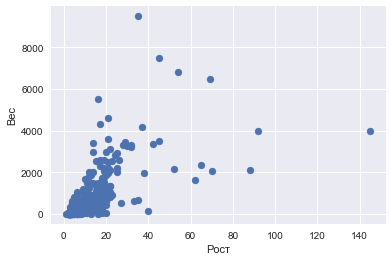

In [60]:
plt.scatter(pokemons['height'], pokemons['weight'])
plt.xlabel('Рост')
plt.ylabel('Вес')

### Видно, что параметры покемонов находятся в каких-то пределах: рост редко превышает 20, а вес в основном находится в пределах 2-3 тысяч
#### Но Steelix совсем не самый высокий или тяжелый. Кто же, если не он?

In [67]:
pokemons[pokemons.height > 140]

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
320,321,wailord,Wailord,Wailord,Float Whale,ホエルオー,Whaloh,うきくじら,3,321,...,206,70,5,12.0,0,NaN,40,1640000,348,321.0


### Самый высокий покемон - Wailord. И это... Кит. Ничего удивительного в его росте

![Image of Yaktocat](https://img.pokemondb.net/artwork/wailord.jpg)

### Wailord любит солнышко и брызгаться. NYA

In [68]:
pokemons[pokemons.weight > 8000]

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
382,383,groudon,Groudon,Groudon,Continent,グラードン,Groudon,たいりく,3,383,...,218,0,15,NaN,0,NaN,120,1250000,415,383.0


### Самым тяжелым был признан Groudon. Посмотрим на него!

![Image of Yaktocat](https://img.pokemondb.net/artwork/groudon.jpg)

### Спит в магме под землей. Это все, что вам нужно знать.

## Предлагаю обратиться к ящикам-с-усами и оценить разброс значений роста и веса в зависимости от поколений

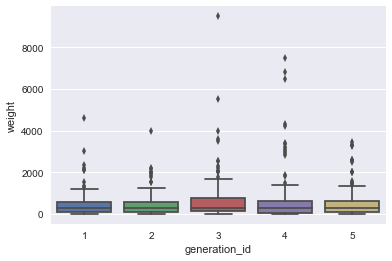

In [54]:
sns.boxplot(pokemons['generation_id'], pokemons['weight'])

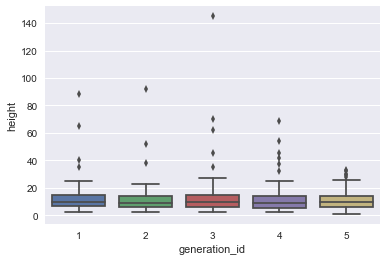

In [55]:
sns.boxplot(pokemons['generation_id'], pokemons['height'])

### Выбросы есть во всех поколениях, поэтому давайте временно избавимся от них 

In [79]:
poks_not_heavy = pokemons[pokemons['weight']<1300]
poks_not_high = pokemons[pokemons['height']<30]

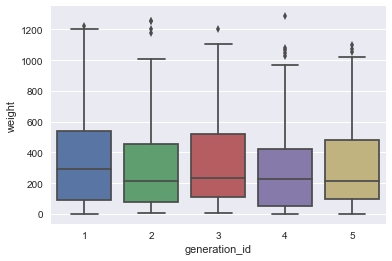

In [80]:
sns.boxplot(pokemons['generation_id'], poks_not_heavy.weight)

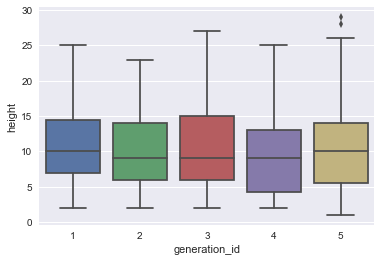

In [74]:
sns.boxplot(pokemons['generation_id'], poks_not_high.height)

#### Даже в таком удобном виде нетрудно заметить, что поколение не особо влияет на рост и вес покемона

Гугл подсказал, что в этом нет ничего удивительного. Поколение покемонов - не то, что мы привыкли считать поколением. Это не покебабушки и покевнуки и даже не эволюционирование в новый покевид.
Поколение I (иногда, называется цветное поколение) - первый набор игр по вселенной Покемон и, соответственно, все покемоны из этих игр. Всего в первом поколении 151 покемон.

# Спасибо за внимание. Надеюсь, было интересно :)